In [93]:
#習ったモデルは一通り試したので変数選択に工夫を出してみる。
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#データの読み込み、性別はダミー変数化。
df = pd.read_csv("train.csv").replace("male", 0).replace("female", 1)

#乗船場所もそれぞれダミー変数化しておく。
embarked_dummies = pd.get_dummies(df["Embarked"])
df = df.drop("Embarked", axis = 1)
df = pd.concat((df, embarked_dummies), axis = 1)

#FamSizeを本人+Sib+Parchで作成。
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df = df.drop(["SibSp", "Parch"], axis = 1)#Familysizeに統合された奴は省いたDf作成。

df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,C,Q,S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,0,1,1


In [94]:
#データフレームを生死で分けてみて色んな変数と見比べてみる。データ探索をする。
split_data = [] #dataframeをSurvivedが0,1の人で二つのリストに分けるための箱。
for survived in [0, 1]:
    split_data.append(df[df.Survived == survived])

([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

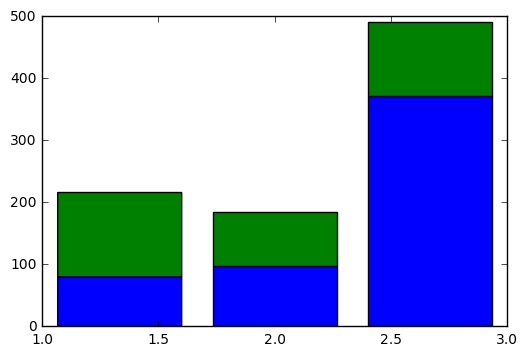

In [95]:
#まずはPclassとの関係性。チケットクラスが下がるほど、3rdになるほど0=deadが増えている。
temp = [i["Pclass"].dropna() for i in split_data] #一時的にヒストグラムに居れる変数もSurvivedの0 = dead,1 = aliveで分ける。Split_dataの中をForで回すけど実質二回だけ。
plt.hist(temp, histtype = "barstacked", bins = 3)

([array([ 468.,   81.]), array([ 577.,  314.])],
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Lists of Patches objects>)

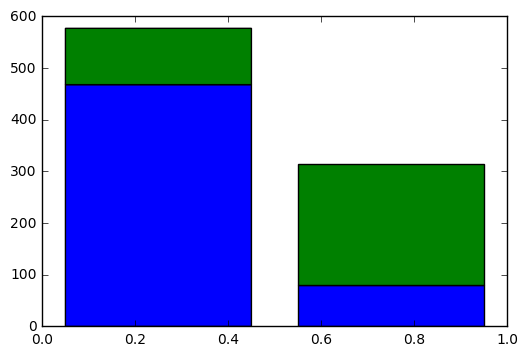

In [96]:
#性別で見ると、男性,０の死亡率が高く、女性は多く救助されている。
temp = [i["Sex"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 2)

([array([ 474.,   75.]), array([ 723.,  168.])],
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Lists of Patches objects>)

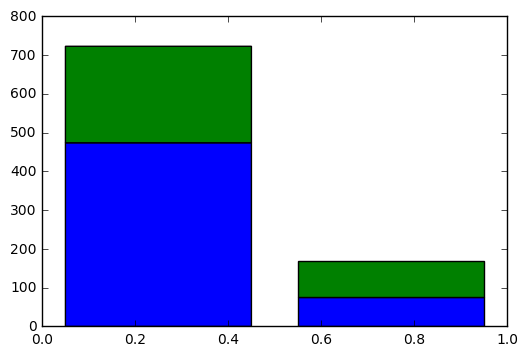

In [97]:
#乗船場所は流石に関係なさそう。だが一応一つづつ確認してみる。
temp = [i["C"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 2)

([array([ 502.,   47.]), array([ 814.,   77.])],
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Lists of Patches objects>)

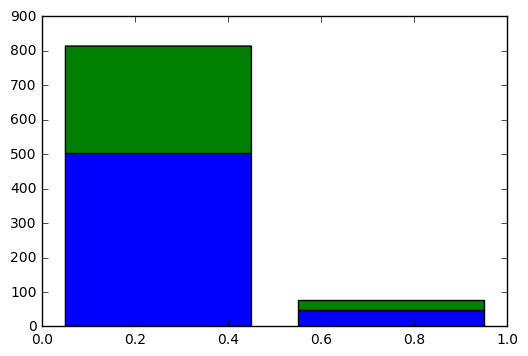

In [98]:
#乗船場所は流石に関係なさそう。だが一応一つづつ確認してみる。
temp = [i["Q"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 2)

([array([ 122.,  427.]), array([ 247.,  644.])],
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Lists of Patches objects>)

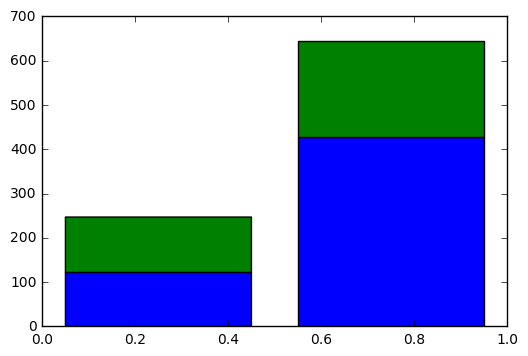

In [99]:
#乗船場所は流石に関係なさそう。だが一応一つづつ確認してみる。
temp = [i["S"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 2)

([array([  26.,   71.,  146.,   86.,   53.,   25.,   13.,    4.]),
  array([  64.,  115.,  230.,  155.,   86.,   42.,   17.,    5.])],
 array([  0.42  ,  10.3675,  20.315 ,  30.2625,  40.21  ,  50.1575,
         60.105 ,  70.0525,  80.    ]),
 <a list of 2 Lists of Patches objects>)

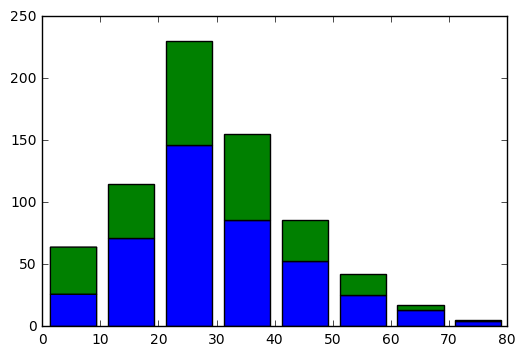

In [100]:
#年齢はどうだろう。老人と子供は先に救助されるっていう描写が映画にはあるけれど、10歳以下の子供には明確な相関がなさそう。50代以降の人は確かに生存割合が高めになっている。
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 8)

([array([ 374.,   72.,   43.,    8.,   12.,    0.,   19.,    8.,    6.,
            0.,    0.,    7.]),
  array([ 537.,  161.,  102.,   29.,   15.,    0.,   22.,   12.,    6.,
            0.,    0.,    7.])],
 array([  1.        ,   1.83333333,   2.66666667,   3.5       ,
          4.33333333,   5.16666667,   6.        ,   6.83333333,
          7.66666667,   8.5       ,   9.33333333,  10.16666667,  11.        ]),
 <a list of 2 Lists of Patches objects>)

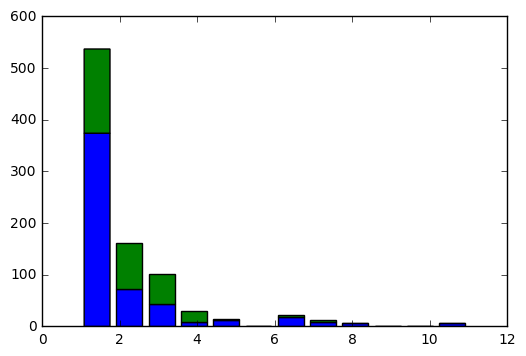

In [114]:
#FamilySizeを見てみよう。同じ部屋に滞在した人には規則性があるっていう可能性があるという記事が出ていたので。
#意外と有益な情報っぽい。二人以下の集団は大体亡くなっている。
#一方で3－4人の集団は生存率が上回り気味。
#さらに5人以上になるとほとんど死亡している。一遍に救助することの困難さが出ている。
temp = [i["FamilySize"].dropna() for i in split_data]
plt.hist(temp, histtype = "barstacked", bins = 12)

In [115]:
#上記の直感的なビジュアルを各変数の平均を算出して数値的にも意義が得られるかを検証する。
print (df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [116]:
print (df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.188908
1    1  0.742038


In [117]:
print (df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [118]:
#乗船場所も一応確認してみる。
print (df[['C', 'Survived']].groupby(['C'], as_index=False).mean())
print (df[['Q', 'Survived']].groupby(['Q'], as_index=False).mean())
print (df[['S', 'Survived']].groupby(['S'], as_index=False).mean())

   C  Survived
0  0  0.344398
1  1  0.553571
   Q  Survived
0  0  0.383292
1  1  0.389610
   S  Survived
0  0  0.506073
1  1  0.336957
